In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

In [43]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [23]:
for i in data.columns:
    if data[i].dtype == "O":
        print(data[i].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [47]:
data=pd.get_dummies(data,drop_first=True)
data.shape

(918, 16)

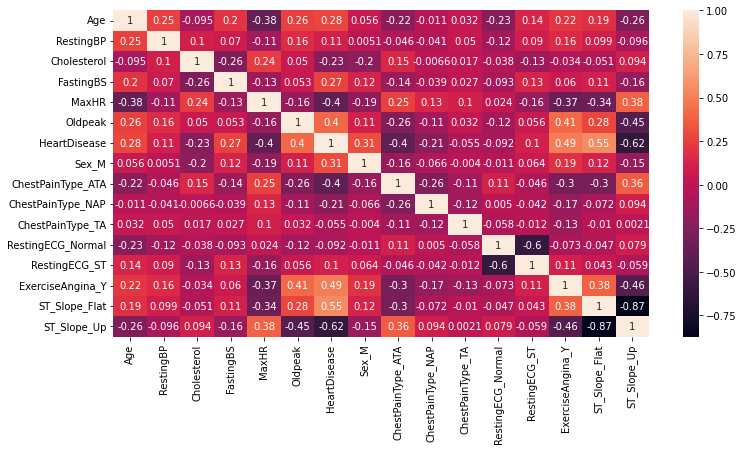

In [48]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X=data.drop(columns='HeartDisease',axis=1)
y=data['HeartDisease']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\ml\new\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
predictions=lr.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,predictions),2)

0.89

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[32,  8],
       [ 2, 50]], dtype=int64)

In [115]:
y_test.shape

(92,)

D:\ml\new\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


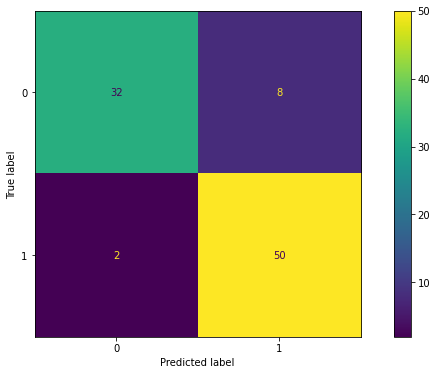

In [116]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,y_test)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
rf_predictions=rf_model.predict(X_test)

In [127]:
print(round(accuracy_score(y_test,rf_predictions),2))

0.87


D:\ml\new\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


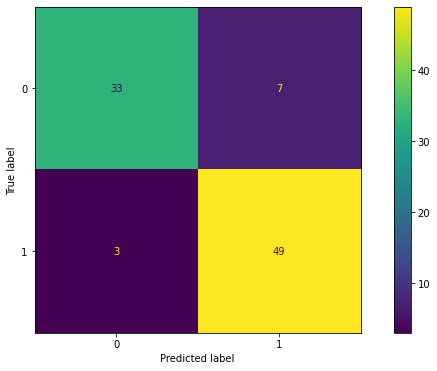

In [119]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [120]:
from sklearn.naive_bayes import GaussianNB

In [122]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [121]:
nb_predictions=nb.predict(X_test)
round(accuracy_score(y_test,nb_predictions),2)

0.89

In [130]:
nb_matrix=confusion_matrix(y_test,nb_predictions)

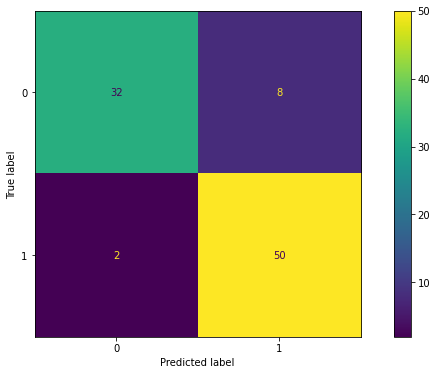

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay(confusion_matrix=nb_matrix,display_labels=nb.classes_)
cm.plot()

In [123]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [124]:
kn_prediction=kn.predict(X_test)
accuracy_score(y_test,kn_prediction)

0.7391304347826086